In [1]:
#library Classification
import pandas as pd
import string
import numpy as np
import nltk

In [2]:
#Mesin Learning Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder, OneHotEncoder
#KNN
from sklearn.neighbors import KNeighborsClassifier
#SVM
from sklearn.svm import SVC
#DTree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
#RF
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier

In [3]:
#visualisasi hasil
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#memanggil dataset
filecsv='bankfull01.csv'
teks=pd.read_csv(filecsv, header=0, delimiter=';', encoding='utf-8')
df=pd.DataFrame(teks)
print(df)

      id  age           job   marital  education default  balance housing  \
0      0   58    management   married   tertiary      no     2143     yes   
1      1   44    technician    single  secondary      no       29     yes   
2      2   33  entrepreneur   married  secondary      no        2     yes   
3      3   47   blue-collar   married    unknown      no     1506     yes   
4      4   33       unknown    single    unknown      no        1      no   
..   ...  ...           ...       ...        ...     ...      ...     ...   
495  495   39        admin.    single  secondary      no        0     yes   
496  496   39   blue-collar  divorced  secondary      no       42     yes   
497  497   50   blue-collar  divorced  secondary      no       41     yes   
498  498   44   blue-collar   married  secondary      no      -99     yes   
499  499   37    technician    single  secondary      no       17     yes   

    loan  contact  day month  duration  campaign  pdays  previous poutcome 

In [5]:
#input parameter untuk prediksi class
xTarget=df.drop(['id', 'y'], axis=1)
print(xTarget)

     age           job   marital  education default  balance housing loan  \
0     58    management   married   tertiary      no     2143     yes   no   
1     44    technician    single  secondary      no       29     yes   no   
2     33  entrepreneur   married  secondary      no        2     yes  yes   
3     47   blue-collar   married    unknown      no     1506     yes   no   
4     33       unknown    single    unknown      no        1      no   no   
..   ...           ...       ...        ...     ...      ...     ...  ...   
495   39        admin.    single  secondary      no        0     yes   no   
496   39   blue-collar  divorced  secondary      no       42     yes   no   
497   50   blue-collar  divorced  secondary      no       41     yes   no   
498   44   blue-collar   married  secondary      no      -99     yes   no   
499   37    technician    single  secondary      no       17     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  
0  

In [6]:
#target classification dari acc/rejected loan
yTarget=df['y']
print(yTarget)

0      no
1      no
2      no
3      no
4      no
       ..
495    no
496    no
497    no
498    no
499    no
Name: y, Length: 500, dtype: object


In [7]:
#merubah (encode) nilai yTarget menjadi dua class yaitu 0 dan 1
encoder = LabelBinarizer()
Y = encoder.fit_transform(yTarget)
print(Y)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [8]:
#merubah (encode) nilai atribut menjadi index nilai
tfidf_transformer=OneHotEncoder()
X=tfidf_transformer.fit_transform(xTarget)
print(X)
print(X.shape)

  (0, 36)	1.0
  (0, 44)	1.0
  (0, 53)	1.0
  (0, 57)	1.0
  (0, 59)	1.0
  (0, 389)	1.0
  (0, 411)	1.0
  (0, 412)	1.0
  (0, 414)	1.0
  (0, 415)	1.0
  (0, 417)	1.0
  (0, 598)	1.0
  (0, 742)	1.0
  (0, 747)	1.0
  (0, 748)	1.0
  (0, 749)	1.0
  (1, 22)	1.0
  (1, 49)	1.0
  (1, 54)	1.0
  (1, 56)	1.0
  (1, 59)	1.0
  (1, 123)	1.0
  (1, 411)	1.0
  (1, 412)	1.0
  (1, 414)	1.0
  :	:
  (498, 412)	1.0
  (498, 414)	1.0
  (498, 416)	1.0
  (498, 417)	1.0
  (498, 475)	1.0
  (498, 743)	1.0
  (498, 747)	1.0
  (498, 748)	1.0
  (498, 749)	1.0
  (499, 15)	1.0
  (499, 49)	1.0
  (499, 54)	1.0
  (499, 56)	1.0
  (499, 59)	1.0
  (499, 112)	1.0
  (499, 411)	1.0
  (499, 412)	1.0
  (499, 414)	1.0
  (499, 416)	1.0
  (499, 417)	1.0
  (499, 517)	1.0
  (499, 742)	1.0
  (499, 747)	1.0
  (499, 748)	1.0
  (499, 749)	1.0
(500, 750)


In [9]:
#membuat data training dan testing dari dataset dengan data test = 30%
#dari jumlah instance
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(350, 750)
(350, 1)
(150, 750)
(150, 1)


In [10]:
#melakukan pembuatan model training
NaiveBayes = MultinomialNB().fit(X_train,np.ravel(y_train,order='C'))
Knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train,np.ravel(y_train,order='C'))
RandomForest = RandomForestClassifier(n_estimators=50, max_depth=3).fit(X_train,np.ravel(y_train,order='C'))
DTree = DecisionTreeClassifier().fit(X_train,np.ravel(y_train,order='C'))
SuppVM = SVC(gamma='scale', decision_function_shape='ovo', kernel='linear').fit(X_train,np.ravel(y_train,order='C'))

print(NaiveBayes)
print(Knn)
print(RandomForest)
print(DTree)
print(SuppVM)

MultinomialNB()
KNeighborsClassifier(n_neighbors=3)
RandomForestClassifier(max_depth=3, n_estimators=50)
DecisionTreeClassifier()
SVC(decision_function_shape='ovo', kernel='linear')


In [11]:
#prediksi terhadap nilai training yang telah dibuat
models = [
    NaiveBayes,
    Knn,
    RandomForest,
    DTree,
    SuppVM,
]
dlist = [
    'NB',
    'K-NN',
    'RF',
    'DT',
    'SVM',
]

i=0
print(y_test.shape)
entries = []
for model in models:
    prediction = model.predict(X_test)
    accuracies = accuracy_score(y_test, prediction)
    nameS = dlist[i]
    entries.append((nameS, model, accuracies))
    i=i+1
    
cv_df = pd.DataFrame(entries, columns=['Classifieer', 'prediction', 'accuracy'])
cv_df.to_csv('akurasiBank.csv')
print(cv_df)

(150, 1)
  Classifieer                                         prediction  accuracy
0          NB                                    MultinomialNB()  0.986667
1        K-NN                KNeighborsClassifier(n_neighbors=3)  0.986667
2          RF  (DecisionTreeClassifier(max_depth=3, max_featu...  0.986667
3          DT                           DecisionTreeClassifier()  0.980000
4         SVM  SVC(decision_function_shape='ovo', kernel='lin...  0.986667


In [12]:
cv_df = pd.DataFrame(entries, columns=['Classifieer', 'prediction', 'accuracy'])
#cv_df.to_csv('akurasiBank.csv')
#print(cv_df)

#Menampilkan confusion matrix
print(confusion_matrix(y_test, prediction))

print(cv_df.groupby('accuracy').accuracy.mean())

[[148   0]
 [  2   0]]
accuracy
0.980000    0.980000
0.986667    0.986667
Name: accuracy, dtype: float64


In [13]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[148   0]
 [  2   0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


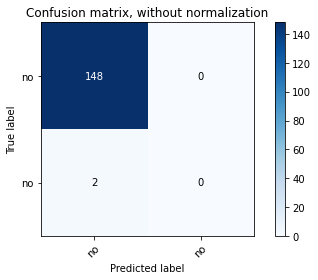

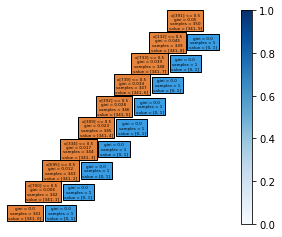

In [14]:
class_names = yTarget
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plot_tree(DTree, filled=True)

plt.show()